In [1]:
import numpy as np
import scipy.stats as stats  # Import stats module
from plotly.io import show
import plotly.express as px
import pandas as pd
from plotly.subplots import make_subplots


    'CONNECTION_social_days_friends_p7d',
    'CONNECTION_social_days_coworkers_and_classmates_p7d',
    'CONNECTION_social_days_neighbours_p7d',
    'CONNECTION_activities_community_last',
    'CONNECTION_activities_church_last',
    'CONNECTION_community_involvement_religious_p3m',
    'CONNECTION_community_involvement_union_p3m',
    'CONNECTION_community_involvement_political_p3m',
    'CONNECTION_community_involvement_sports_p3m',
    'CONNECTION_community_involvement_hobby_p3m',
    'CONNECTION_community_involvement_civic_p3m',
    'CONNECTION_community_involvement_service_p3m',
    'CONNECTION_community_involvement_seniors_p3m',
    'CONNECTION_community_involvement_youth_p3m',
    'CONNECTION_community_involvement_ethnic_p3m',
    'CONNECTION_community_involvement_other_p3m',
    'GATHERINGS_social_gathering_P7D',
    'GATHERINGS_day',
    'GATHERINGS_num_total',
    'CONNECTION_meaningful_social_interactions_last',
    'CONNECTION_activities_meeting_non_work_last',

    unused due to not being collected in 2021 and 2023


    To do
    correlation coefficient
    melt the rest of the groups
    bootstrap groups
    

In [2]:
# import data
url = "https://raw.githubusercontent.com/pointOfive/stat130chat130/refs/heads/main/CP/CSCS_data_anon.csv"
data = pd.read_csv(url, low_memory=False)



In [4]:
#to make sure it worked
data

,UNIQUE_id,UNIQUE_num_records,ELIGIBLE_consent,GEO_residence_canada,GEO_province,DEMO_age,DEMO_gender,DEMO_identity_vetrans,DEMO_identity_indigenous,DEMO_identity_lgbtq,...,PSYCH_body_self_image_questionnaire_height_dissatisfaction_score,PSYCH_body_self_image_questionnaire_fatness_evaluation_score,PSYCH_body_self_image_questionnaire_negative_affect_score,PSYCH_body_self_image_questionnaire_social_dependence_score,PSYCH_big_five_inventory_agreeable_score,PSYCH_big_five_inventory_conscientious_score,PSYCH_big_five_inventory_extraverted_score,PSYCH_big_five_inventory_neurotic_score,PSYCH_big_five_inventory_open_score,REMOVE_case
0,cscs_00001,1,Yes,Yes,British Columbia,71.0,Non-binary,NaN,NaN,"Sexual or gender minorities (e.g., LGBTQ2+)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
1,cscs_00002,1,Yes,Yes,Ontario,69.0,Woman,NaN,NaN,Not Selected,...,3.0,8.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,No
2,cscs_00003,1,Yes,Yes,Quebec,56.0,Woman,NaN,NaN,Not Selected,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
3,cscs_00005,1,Yes,Yes,NaN,54.0,Woman,NaN,NaN,Not Selected,...,NaN,NaN,NaN,NaN,28.0,34.0,30.0,32.0,37.0,No
4,cscs_00006,1,Yes,Yes,Ontario,30.0,Man,Not Selected,"Indigenous peoples (e.g., First Nations, Métis...","Sexual or gender minorities (e.g., LGBTQ2+)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11426,cscs_11809,1,Yes,Yes,NaN,45.0,Woman,NaN,NaN,"Sexual or gender minorities (e.g., LGBTQ2+)",...,NaN,NaN,NaN,NaN,31.0,33.0,33.0,13.0,39.0,No
11427,cscs_11810,1,Yes,Yes,British Columbia,36.0,Man,NaN,NaN,Not Selected,...,NaN,NaN,NaN,NaN,32.0,37.0,31.0,NaN,38.0,No
11428,cscs_11812,3,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
11429,cscs_11812,3,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes


In [5]:
# This variable indicates cases we recommend removing from an analysis due to fast completion times or possible fraudulent responses.
data.REMOVE_case.value_counts()

REMOVE_case
No       10018
Yes       1153
Maybe      260
Name: count, dtype: int64

In [6]:
# Let's just keep the recommended data
dataV2 = data[data.REMOVE_case=='No'].copy()
dataV2.shape

(10018, 1794)

In [7]:
# This variable indicates the dataset that the observation belongs to
data.DATASET.value_counts()


DATASET
2022 Cross-Sectional    3916
2021 Cross-Sectional    3589
2023 Cross-Sectional    3058
2022 Cohort              493
2023 Cohort              375
Name: count, dtype: int64

In [8]:
# Ignore last one honestly, we use this
dataV2.SURVEY_collection_year.value_counts()

SURVEY_collection_year
2022    3896
2021    3186
2023    2936
Name: count, dtype: int64

In [9]:
# removing all that didnt answer the life satisfaction question
column_name = 'WELLNESS_life_satisfaction'

data_cleaned = dataV2.dropna(subset=column_name)

# Display the cleaned data (optional)
print(data_cleaned.head())

    UNIQUE_id  UNIQUE_num_records ELIGIBLE_consent GEO_residence_canada  \
0  cscs_00001                   1              Yes                  Yes   
1  cscs_00002                   1              Yes                  Yes   
2  cscs_00003                   1              Yes                  Yes   
3  cscs_00005                   1              Yes                  Yes   
4  cscs_00006                   1              Yes                  Yes   

       GEO_province  DEMO_age DEMO_gender DEMO_identity_vetrans  \
0  British Columbia      71.0  Non-binary                   NaN   
1           Ontario      69.0       Woman                   NaN   
2            Quebec      56.0       Woman                   NaN   
3               NaN      54.0       Woman                   NaN   
4           Ontario      30.0         Man          Not Selected   

                            DEMO_identity_indigenous  \
0                                                NaN   
1                                 

In [10]:
#use this in case you you didnt delete the entire thing somehow (i did... multiple times...)
data_cleaned_copy = data_cleaned.copy()

In [11]:
#removes all non answer answers
# Replace 'Presented but no response' with NaN in the entire DataFrame
data_cleaned_copy.replace('Presented but no response', pd.NA, inplace=True)

# Display the modified DataFrame
print(data_cleaned_copy)

        UNIQUE_id  UNIQUE_num_records ELIGIBLE_consent GEO_residence_canada  \
0      cscs_00001                   1              Yes                  Yes   
1      cscs_00002                   1              Yes                  Yes   
2      cscs_00003                   1              Yes                  Yes   
3      cscs_00005                   1              Yes                  Yes   
4      cscs_00006                   1              Yes                  Yes   
...           ...                 ...              ...                  ...   
11425  cscs_11808                   1              Yes                  Yes   
11426  cscs_11809                   1              Yes                  Yes   
11427  cscs_11810                   1              Yes                  Yes   
11428  cscs_11812                   3              Yes                  NaN   
11430  cscs_11812                   3              Yes                  Yes   

           GEO_province  DEMO_age DEMO_gender DEMO_

C:\Users\danie\AppData\Local\Temp\ipykernel_29808\3996956230.py:3: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [12]:
# Columns that are relevant for data
columns_to_keep = [
    'WELLNESS_life_satisfaction',
    'WELLNESS_malach_pines_burnout_measure_depressed',
    'CONNECTION_activities_talked_job_p3m',
    'CONNECTION_activities_community_p3m',
    'CONNECTION_activities_meeting_work_p3m',
    'CONNECTION_activities_church_p3m',
    'LONELY_ucla_loneliness_scale_isolated',
    'WELLNESS_self_rated_mental_health',
    'CONNECTION_activities_meeting_non_work_pm',
    'CONNECTION_activities_church_pm',
    'SURVEY_collection_year'

]

# filters data using columns you want
filtered_data = data_cleaned_copy[columns_to_keep]

# make sure it worked
print(filtered_data.head())
#counts columns to make sure it worked again
num_columns = filtered_data.shape[1]
# if you want to double check
print(f'The number of columns is: {num_columns}')


   WELLNESS_life_satisfaction WELLNESS_malach_pines_burnout_measure_depressed  \
0                         2.0                                             NaN   
1                         7.0                                             NaN   
2                         5.0                                             NaN   
3                         4.0                                             NaN   
4                         8.0                                       Sometimes   

  CONNECTION_activities_talked_job_p3m CONNECTION_activities_community_p3m  \
0                                  NaN                                 NaN   
1                                  NaN                                 NaN   
2                                  NaN                                 NaN   
3                                  NaN                              Weekly   
4                               Weekly                              Weekly   

  CONNECTION_activities_meeting_work_p3m CON

In [13]:
# 2021 dataset
dataset_2021 = filtered_data[filtered_data['SURVEY_collection_year'] == 2021]

# 2023 dataset
dataset_2023 = filtered_data[filtered_data['SURVEY_collection_year'] == 2023]



In [14]:
#again use in case of deletion of entire dataset
dataset_2021_copy = dataset_2021.copy()
dataset_2023_copy = dataset_2023.copy()
filtered_data_copy = filtered_data.copy()

In [15]:
dataset_2021_copy
#test

,WELLNESS_life_satisfaction,WELLNESS_malach_pines_burnout_measure_depressed,CONNECTION_activities_talked_job_p3m,CONNECTION_activities_community_p3m,CONNECTION_activities_meeting_work_p3m,CONNECTION_activities_church_p3m,LONELY_ucla_loneliness_scale_isolated,WELLNESS_self_rated_mental_health,CONNECTION_activities_meeting_non_work_pm,CONNECTION_activities_church_pm,SURVEY_collection_year
4,8.0,Sometimes,Weekly,Weekly,A few times a week,Weekly,Hardly Ever,Very good,Yes,Yes,2021
8,1.0,Often,A few times a week,Not in the past three months,Not in the past three months,Not in the past three months,Often,Poor,No,No,2021
10,7.0,Sometimes,A few times a week,A few times a month,A few times a week,Not in the past three months,Some of the time,Very good,Yes,No,2021
13,8.0,Sometimes,Daily or almost daily,Not in the past three months,Not in the past three months,Not in the past three months,Some of the time,Fair,No,No,2021
18,5.0,Sometimes,Daily or almost daily,Not in the past three months,Not in the past three months,Not in the past three months,Some of the time,NaN,No,No,2021
...,...,...,...,...,...,...,...,...,...,...,...
11396,3.0,Often,Monthly,Not in the past three months,Not in the past three months,Not in the past three months,Some of the time,Fair,No,No,2021
11398,7.0,Rarely,A few times a month,Not in the past three months,Less than monthly,Not in the past three months,Some of the time,Good,No,No,2021
11407,8.0,Sometimes,Weekly,A few times a month,A few times a month,Weekly,Some of the time,Very good,Yes,Yes,2021
11410,8.0,Rarely,A few times a month,Monthly,A few times a month,Weekly,Some of the time,Good,Yes,Yes,2021


In [16]:
dataset_2023_copy
#test

,WELLNESS_life_satisfaction,WELLNESS_malach_pines_burnout_measure_depressed,CONNECTION_activities_talked_job_p3m,CONNECTION_activities_community_p3m,CONNECTION_activities_meeting_work_p3m,CONNECTION_activities_church_p3m,LONELY_ucla_loneliness_scale_isolated,WELLNESS_self_rated_mental_health,CONNECTION_activities_meeting_non_work_pm,CONNECTION_activities_church_pm,SURVEY_collection_year
3,4.0,NaN,NaN,Weekly,NaN,Weekly,NaN,Poor,Yes,Yes,2023
6,5.0,NaN,NaN,Not in the past three months,NaN,Not in the past three months,NaN,Good,No,No,2023
14,6.0,NaN,NaN,Weekly,NaN,Not in the past three months,NaN,Good,No,No,2023
17,6.0,NaN,NaN,Not in the past three months,NaN,Not in the past three months,NaN,Fair,No,No,2023
25,1.0,NaN,NaN,Not in the past three months,NaN,Not in the past three months,NaN,Poor,No,No,2023
...,...,...,...,...,...,...,...,...,...,...,...
11415,10.0,NaN,NaN,A few times a week,NaN,Weekly,NaN,Excellent,No,Yes,2023
11418,8.0,NaN,NaN,Weekly,NaN,Weekly,NaN,Very good,Yes,Yes,2023
11419,10.0,NaN,NaN,Not in the past three months,NaN,Not in the past three months,NaN,Excellent,No,No,2023
11425,5.0,NaN,NaN,Not in the past three months,NaN,Not in the past three months,NaN,Good,No,No,2023


In [25]:
#used to check columns for words to be replaced into a number system for charts
# Specify the column
column_name = 'COLUMN_HERE'

# gets all values
unique_values = dataset_2021_copy[column_name].unique()

print(f"The unique values are: {unique_values}")

KeyError: 'COLUMN_HERE'

In [ ]:
#2023 version in case i need to double check the stuffs
column_name = 'COLUMN_HERE'

# gets all values
unique_values = dataset_2023_copy[column_name].unique()

print(f"The unique values are: {unique_values}")

In [17]:
#used to turn word answers into number variables, I have copied multiple times so i dont have to keep replacing each word choice

#used for 2023
dataset_2023_copy['COLUMN HERE'] = dataset_2023_copy['COLUMN HERE'].replace({
    'Daily or almost daily': 7,
    'A few times a week': 6,
    'Weekly': 5,
    'A few times a month': 4,
    'Monthly': 3,
    'Less than monthly': 2,
    'Not in the past three months':1
})

In [188]:

#used for 2021
dataset_2021_copy['COLUNM HERE'] = dataset_2021_copy['COLUNM HERE'].replace({
    'Daily or almost daily': 7,
    'A few times a week': 6,
    'Excellent': 5,
    'Very good': 4,
    'Good': 3,
    'Fair': 2,
    'Poor':1
})

In [189]:

#used for 2023
dataset_2023_copy['COLUNM HERE'] = dataset_2023_copy['COLUNM HERE'].replace({
    'Daily or almost daily': 7,
    'A few times a week': 6,
    'Excellent': 5,
    'Very good': 4,
    'Good': 3,
    'Fair': 2,
    'Poor':1
})

In [22]:
# Melt the columns to combine data


#2021, If they met in the past month at non work or religious activity
melted_data_activities_2021 = dataset_2021_copy[[    
    'CONNECTION_activities_meeting_non_work_pm',
    'CONNECTION_activities_church_pm']].melt(value_name="meetings_2021")

#shows answers of combined groups
frequency_counts_activities_2021 = melted_data_activities_2021['meetings_2021'].value_counts()


print(frequency_counts_activities_2021)
#when i first did this it was flipped, now im really confused (i double checked it and this was right)

meetings_2021
Yes    2929
No     2881
Name: count, dtype: int64


In [21]:
# Melt the columns to combine data


#2023, If they met in the past month at non work or religious activity
melted_data_activities_2023 = dataset_2023_copy[[    
    'CONNECTION_activities_meeting_non_work_pm',
    'CONNECTION_activities_church_pm']].melt(value_name="meetings_2023")

#shows answers of combined groups
frequency_counts_activities_2023 = melted_data_activities_2023['meetings_2023'].value_counts()


print(frequency_counts_activities_2023)
#very surprised on results ngl

meetings_2023
No     3360
Yes     764
Name: count, dtype: int64


In [23]:
# Melt the columns to combine data


#2023, if they did any of the following in the past 3 months
melted_data_activities_2023 = dataset_2023_copy[[    
    'CONNECTION_activities_talked_job_p3m',
    'CONNECTION_activities_community_p3m',
    'CONNECTION_activities_meeting_work_p3m',
    'CONNECTION_activities_church_p3m']].melt(value_name="Activity_Frequency_2023")

#shows answers of combined groups
frequency_counts_activities_2023 = melted_data_activities_2023['Activity_Frequency_2023'].value_counts()

print(frequency_counts_activities_2023)


Activity_Frequency_2023
Not in the past three months    2983
Less than monthly                364
Weekly                           275
A few times a month              194
Monthly                          162
A few times a week                91
Daily or almost daily             42
Name: count, dtype: int64


In [20]:
#idk why the one above answers, these columns should have been removed but okay, using this box for testing
dataset_2023_copy

,WELLNESS_life_satisfaction,WELLNESS_malach_pines_burnout_measure_depressed,CONNECTION_activities_talked_job_p3m,CONNECTION_activities_community_p3m,CONNECTION_activities_meeting_work_p3m,CONNECTION_activities_church_p3m,LONELY_ucla_loneliness_scale_isolated,WELLNESS_self_rated_mental_health,CONNECTION_activities_meeting_non_work_pm,CONNECTION_activities_church_pm,SURVEY_collection_year
3,4.0,NaN,NaN,Weekly,NaN,Weekly,NaN,Poor,Yes,Yes,2023
6,5.0,NaN,NaN,Not in the past three months,NaN,Not in the past three months,NaN,Good,No,No,2023
14,6.0,NaN,NaN,Weekly,NaN,Not in the past three months,NaN,Good,No,No,2023
17,6.0,NaN,NaN,Not in the past three months,NaN,Not in the past three months,NaN,Fair,No,No,2023
25,1.0,NaN,NaN,Not in the past three months,NaN,Not in the past three months,NaN,Poor,No,No,2023
...,...,...,...,...,...,...,...,...,...,...,...
11415,10.0,NaN,NaN,A few times a week,NaN,Weekly,NaN,Excellent,No,Yes,2023
11418,8.0,NaN,NaN,Weekly,NaN,Weekly,NaN,Very good,Yes,Yes,2023
11419,10.0,NaN,NaN,Not in the past three months,NaN,Not in the past three months,NaN,Excellent,No,No,2023
11425,5.0,NaN,NaN,Not in the past three months,NaN,Not in the past three months,NaN,Good,No,No,2023


In [25]:
# Melt the columns to combine data


#2021, if they did any of the following in the past 3 months
melted_data_activities_2021 = dataset_2021_copy[[    
    'CONNECTION_activities_talked_job_p3m',
    'CONNECTION_activities_community_p3m',
    'CONNECTION_activities_meeting_work_p3m',
    'CONNECTION_activities_church_p3m']].melt(value_name="Activity_Frequency_2021")

#shows answers of combined groups
frequency_counts_activities_2021 = melted_data_activities_2021['Activity_Frequency_2021'].value_counts()

print(frequency_counts_activities_2021)


Activity_Frequency_2021
Not in the past three months    3550
A few times a month             2055
Weekly                          1781
Monthly                         1569
Less than monthly               1129
A few times a week               995
Daily or almost daily            540
Name: count, dtype: int64


DO NOT USE, REMOVED COLUMNS DUE TO NOT BEING IN 2021 AND 2023
DO NOT USE, REMOVED COLUMNS DUE TO NOT BEING IN 2021 AND 2023
DO NOT USE, REMOVED COLUMNS DUE TO NOT BEING IN 2021 AND 2023
DO NOT USE, REMOVED COLUMNS DUE TO NOT BEING IN 2021 AND 2023

melted_data_Social_days_2021 = dataset_2021_copy[[
    'CONNECTION_social_days_friends_p7d',
    'CONNECTION_social_days_coworkers_and_classmates_p7d',
    'CONNECTION_social_days_neighbours_p7d']].melt(value_name="Social_days")

#shows answers of combined groups
frequency_counts_Social_days_2021 = melted_data_Social_days_2021['Social_days'].value_counts()


print(frequency_counts_Social_days_2021)
#no results for 2021, hence removed from dataset

In [178]:
dataset_2023



,WELLNESS_life_satisfaction,WELLNESS_malach_pines_burnout_measure_depressed,CONNECTION_activities_talked_job_p3m,CONNECTION_activities_community_p3m,CONNECTION_activities_meeting_work_p3m,CONNECTION_activities_church_p3m,LONELY_ucla_loneliness_scale_isolated,WELLNESS_self_rated_mental_health,CONNECTION_social_days_friends_p7d,CONNECTION_social_days_coworkers_and_classmates_p7d,...,CONNECTION_community_involvement_ethnic_p3m,CONNECTION_community_involvement_other_p3m,GATHERINGS_social_gathering_P7D,GATHERINGS_day,GATHERINGS_num_total,CONNECTION_meaningful_social_interactions_last,CONNECTION_activities_meeting_non_work_last,CONNECTION_activities_meeting_non_work_pm,CONNECTION_activities_church_pm,SURVEY_collection_year
3,4.0,NaN,NaN,Weekly,NaN,Weekly,NaN,Poor,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Yes,2023
6,5.0,NaN,NaN,Not in the past three months,NaN,Not in the past three months,NaN,Good,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No,2023
14,6.0,NaN,NaN,Weekly,NaN,Not in the past three months,NaN,Good,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No,2023
17,6.0,NaN,NaN,Not in the past three months,NaN,Not in the past three months,NaN,Fair,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No,2023
25,1.0,NaN,NaN,Not in the past three months,NaN,Not in the past three months,NaN,Poor,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11418,8.0,NaN,NaN,Weekly,NaN,Weekly,NaN,Very good,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Yes,2023
11419,10.0,NaN,NaN,Not in the past three months,NaN,Not in the past three months,NaN,Excellent,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No,2023
11425,5.0,NaN,NaN,Not in the past three months,NaN,Not in the past three months,NaN,Good,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No,2023
11426,10.0,NaN,NaN,Not in the past three months,NaN,Not in the past three months,NaN,Very good,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No,2023


DO NOT USE, REMOVED COLUMNS DUE TO NOT BEING IN 2021 AND 2023
DO NOT USE, REMOVED COLUMNS DUE TO NOT BEING IN 2021 AND 2023
DO NOT USE, REMOVED COLUMNS DUE TO NOT BEING IN 2021 AND 2023


# Assuming data_cleaned_copy is your DataFrame and it's already loaded

# Melt the selected columns
melted_data_Social_days_2023 = dataset_2023[[
    'CONNECTION_social_days_friends_p7d',
    'CONNECTION_social_days_coworkers_and_classmates_p7d',
    'CONNECTION_social_days_neighbours_p7d']].melt(value_name="Social_days")

# The melted DataFrame will have two columns: one for the column names and one for the values
# We now count the occurrences of each unique social days value
frequency_counts_Social_days_2023 = melted_data_Social_days_2023['Social_days'].value_counts()

# Display the result
print(frequency_counts_Social_days_2023)


DO NOT USE, REMOVED COLUMNS DUE TO NOT BEING IN 2021 AND 2023

DO NOT USE, REMOVED COLUMNS DUE TO NOT BEING IN 2021 AND 2023
DO NOT USE, REMOVED COLUMNS DUE TO NOT BEING IN 2021 AND 2023
DO NOT USE, REMOVED COLUMNS DUE TO NOT BEING IN 2021 AND 2023


melted_data_community_involvement_2023 = dataset_2023[[
    'CONNECTION_community_involvement_religious_p3m',
    'CONNECTION_community_involvement_union_p3m',
    'CONNECTION_community_involvement_political_p3m',
    'CONNECTION_community_involvement_sports_p3m',
    'CONNECTION_community_involvement_hobby_p3m',
    'CONNECTION_community_involvement_civic_p3m',
    'CONNECTION_community_involvement_service_p3m',
    'CONNECTION_community_involvement_seniors_p3m',
    'CONNECTION_community_involvement_youth_p3m',
    'CONNECTION_community_involvement_ethnic_p3m',
    'CONNECTION_community_involvement_other_p3m',]].melt(value_name="Social_days")


frequency_counts_community_involvement_2023 = melted_data_community_involvement_2023['Social_days'].value_counts()


print(frequency_counts_community_involvement_2023)


DO NOT USE, REMOVED COLUMNS DUE TO NOT BEING IN 2021 AND 2023

In [181]:
dataset_2021


,WELLNESS_life_satisfaction,WELLNESS_malach_pines_burnout_measure_depressed,CONNECTION_activities_talked_job_p3m,CONNECTION_activities_community_p3m,CONNECTION_activities_meeting_work_p3m,CONNECTION_activities_church_p3m,LONELY_ucla_loneliness_scale_isolated,WELLNESS_self_rated_mental_health,CONNECTION_social_days_friends_p7d,CONNECTION_social_days_coworkers_and_classmates_p7d,...,CONNECTION_community_involvement_ethnic_p3m,CONNECTION_community_involvement_other_p3m,GATHERINGS_social_gathering_P7D,GATHERINGS_day,GATHERINGS_num_total,CONNECTION_meaningful_social_interactions_last,CONNECTION_activities_meeting_non_work_last,CONNECTION_activities_meeting_non_work_pm,CONNECTION_activities_church_pm,SURVEY_collection_year
4,8.0,Sometimes,Weekly,Weekly,A few times a week,Weekly,Hardly Ever,Very good,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Yes,2021
8,1.0,Often,A few times a week,Not in the past three months,Not in the past three months,Not in the past three months,Often,Poor,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No,2021
10,7.0,Sometimes,A few times a week,A few times a month,A few times a week,Not in the past three months,Some of the time,Very good,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,No,2021
13,8.0,Sometimes,Daily or almost daily,Not in the past three months,Not in the past three months,Not in the past three months,Some of the time,Fair,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No,2021
18,5.0,Sometimes,Daily or almost daily,Not in the past three months,Not in the past three months,Not in the past three months,Some of the time,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11397,2.0,Sometimes,Less than monthly,Weekly,A few times a month,Less than monthly,Some of the time,Very good,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,No,2021
11398,7.0,Rarely,A few times a month,Not in the past three months,Less than monthly,Not in the past three months,Some of the time,Good,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No,2021
11407,8.0,Sometimes,Weekly,A few times a month,A few times a month,Weekly,Some of the time,Very good,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Yes,2021
11410,8.0,Rarely,A few times a month,Monthly,A few times a month,Weekly,Some of the time,Good,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Yes,2021


In [201]:
# Calculate the average of a specific column
average_value = data['WELLNESS_life_satisfaction'].mean()

# Display the result
print(average_value)


6.18220647984165


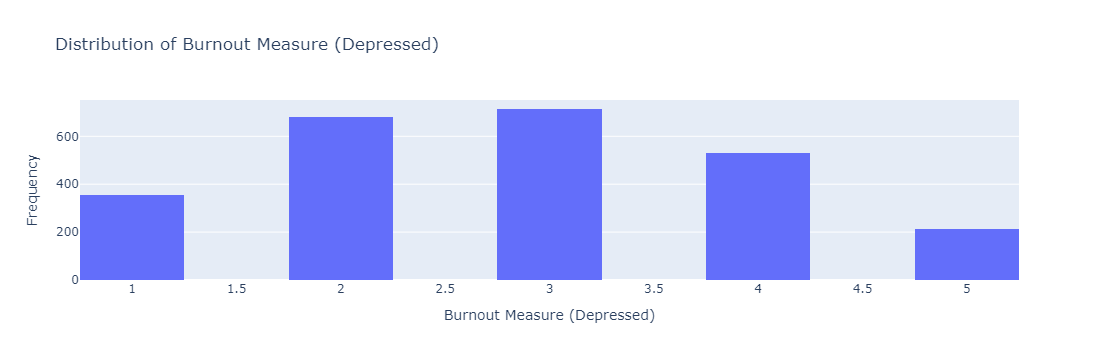

In [194]:
# Assuming 'data_cleaned' is your DataFrame and the column exists
fig = px.histogram(dataset_2023_copy, x='WELLNESS_self_rated_mental_health', nbins=10, title='Distribution of Burnout Measure (Depressed)')

# Update axis labels
fig.update_layout(xaxis_title='Burnout Measure (Depressed)', yaxis_title='Frequency')

# Show the plot
fig.show()

#these are all not updated, i goofed
#these are all not updated, i goofed
#these are all not updated, i goofed
#these are all not updated, i goofed


In [200]:
# Calculate the average of a specific column
average_value = data['WELLNESS_life_satisfaction'].mean()

# Display the result
print(average_value)

6.18220647984165


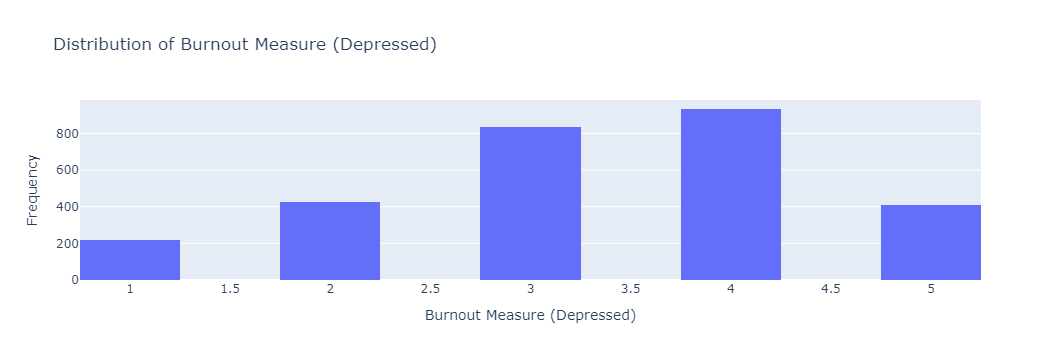

In [195]:
# Assuming 'data_cleaned' is your DataFrame and the column exists
fig = px.histogram(dataset_2021_copy, x='WELLNESS_self_rated_mental_health', nbins=10, title='Distribution of Burnout Measure (Depressed)')

# Update axis labels
fig.update_layout(xaxis_title='Burnout Measure (Depressed)', yaxis_title='Frequency')

# Show the plot
fig.show()

#these are all not updated, i goofed
#these are all not updated, i goofed
#these are all not updated, i goofed
#these are all not updated, i goofed


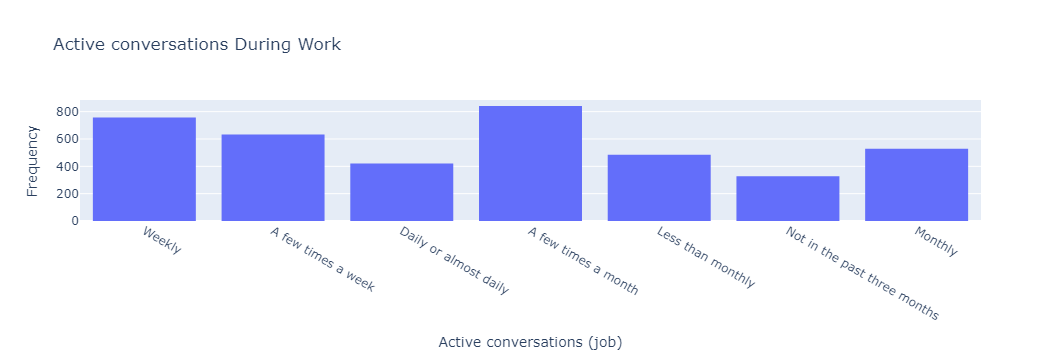

In [184]:
# Assuming 'data_cleaned' is your DataFrame and the column exists
fig = px.histogram(data_cleaned_copy, x='CONNECTION_activities_talked_job_p3m', nbins=10, title='Active conversations During Work')

# Update axis labels
fig.update_layout(xaxis_title='Active conversations (job)', yaxis_title='Frequency')

# Show the plot
fig.show()

#these are all not updated, i goofed
#these are all not updated, i goofed
#these are all not updated, i goofed
#these are all not updated, i goofed

In [29]:
# Assuming you have already melted the data and stored it in 'melted_data'
# Create a bar chart (histogram) to visualize the frequency distribution
fig = px.histogram(melted_data_activities, 
                   x='Activity_Frequency',  # Column with the values from the melted data
                   title='Distribution of Activity Frequencies',
                   labels={'Activity_Frequency': 'Activity Frequency'},
                   category_orders={'Activity_Frequency': melted_data['Activity_Frequency'].value_counts().index.tolist()})

# Show the plot
fig.show()

#these are all not updated, i goofed
#these are all not updated, i goofed
#these are all not updated, i goofed
#these are all not updated, i goofed

NameError: name 'melted_data_activities' is not defined

In [30]:
# Assuming you have already melted the data and stored it in 'melted_data'
# Create a bar chart (histogram) to visualize the frequency distribution
fig = px.histogram(melted_data_Social_days, 
                   x='Social_days',  # Column with the values from the melted data
                   title='Days of Social Activity',
                   labels={'Days of Social Activity': 'Days of Social Activity Frequency'},
                   category_orders={'Days of Social Activity': melted_data_Social_days['Social_days'].value_counts().index.tolist()})

# Show the plot
fig.show()
#these are all not updated, i goofed
#these are all not updated, i goofed
#these are all not updated, i goofed
#these are all not updated, i goofed
#these are all not updated, i goofed

NameError: name 'melted_data_Social_days' is not defined

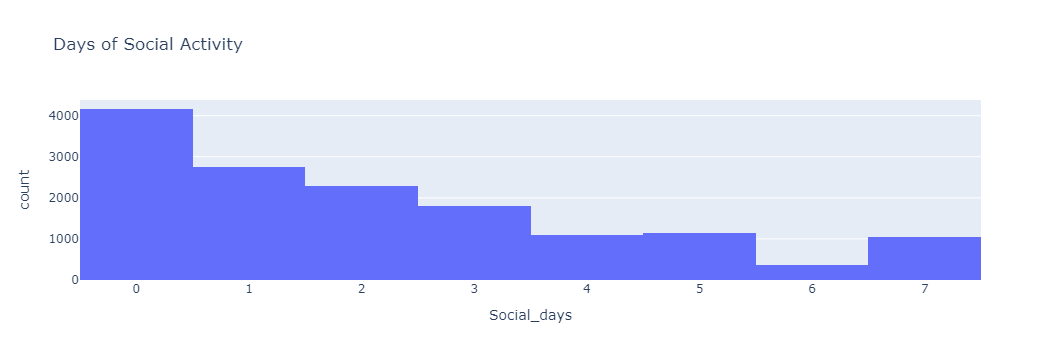

In [187]:
# Assuming you have already melted the data and stored it in 'melted_data'
# Create a bar chart (histogram) to visualize the frequency distribution
fig = px.histogram(melted_data_Social_days_f, 
                   x='Social_days',  # Column with the values from the melted data
                   title='Days of Social Activity',
                   labels={'Days of Social Activity': 'Days of Social Activity Frequency'},
                   category_orders={'Days of Social Activity': melted_data_Social_days_f['Social_days'].value_counts().index.tolist()})

# Show the plot
fig.show()
#these are all not updated, i goofed
#these are all not updated, i goofed
#these are all not updated, i goofed
#these are all not updated, i goofed